Archivos de imagen encontrados: ['Dou2016_001_0000.nii.gz', 'Dou2016_002_0000.nii.gz', 'Dou2016_003_0000.nii.gz', 'Dou2016_004_0000.nii.gz', 'Dou2016_005_0000.nii.gz', 'Dou2016_006_0000.nii.gz', 'Dou2016_007_0000.nii.gz', 'Dou2016_008_0000.nii.gz', 'Dou2016_009_0000.nii.gz', 'Dou2016_010_0000.nii.gz', 'Dou2016_011_0000.nii.gz', 'Dou2016_012_0000.nii.gz', 'Dou2016_013_0000.nii.gz', 'Dou2016_014_0000.nii.gz', 'Dou2016_015_0000.nii.gz', 'Dou2016_016_0000.nii.gz', 'Dou2016_017_0000.nii.gz', 'Dou2016_018_0000.nii.gz', 'Dou2016_019_0000.nii.gz', 'Dou2016_020_0000.nii.gz']
Archivos de máscara encontrados: ['Dou2016_001.nii.gz', 'Dou2016_002.nii.gz', 'Dou2016_003.nii.gz', 'Dou2016_004.nii.gz', 'Dou2016_005.nii.gz', 'Dou2016_006.nii.gz', 'Dou2016_007.nii.gz', 'Dou2016_008.nii.gz', 'Dou2016_009.nii.gz', 'Dou2016_010.nii.gz', 'Dou2016_011.nii.gz', 'Dou2016_012.nii.gz', 'Dou2016_013.nii.gz', 'Dou2016_014.nii.gz', 'Dou2016_015.nii.gz', 'Dou2016_016.nii.gz', 'Dou2016_017.nii.gz', 'Dou2016_018.nii.gz

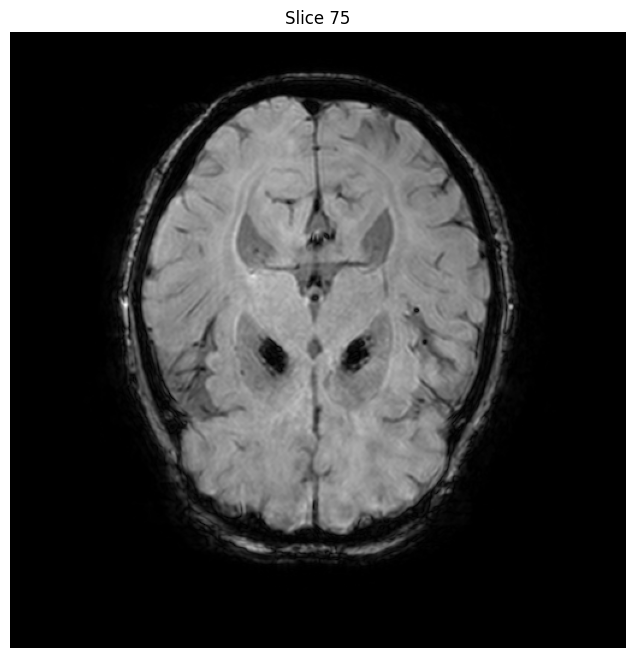

Procesando: Dou2016_002_0000.nii.gz + Dou2016_002.nii.gz
Forma de la imagen: (512, 512, 150)


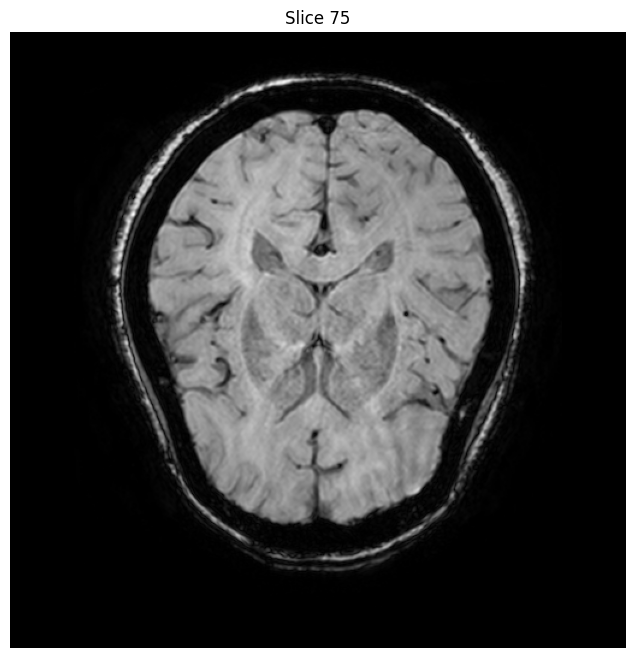

Procesando: Dou2016_003_0000.nii.gz + Dou2016_003.nii.gz
Forma de la imagen: (512, 512, 150)


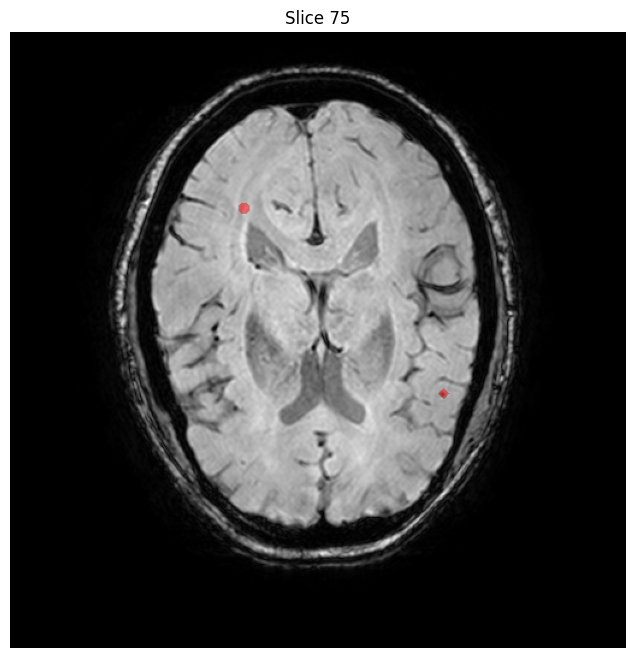

Procesando: Dou2016_004_0000.nii.gz + Dou2016_004.nii.gz
Forma de la imagen: (512, 512, 150)


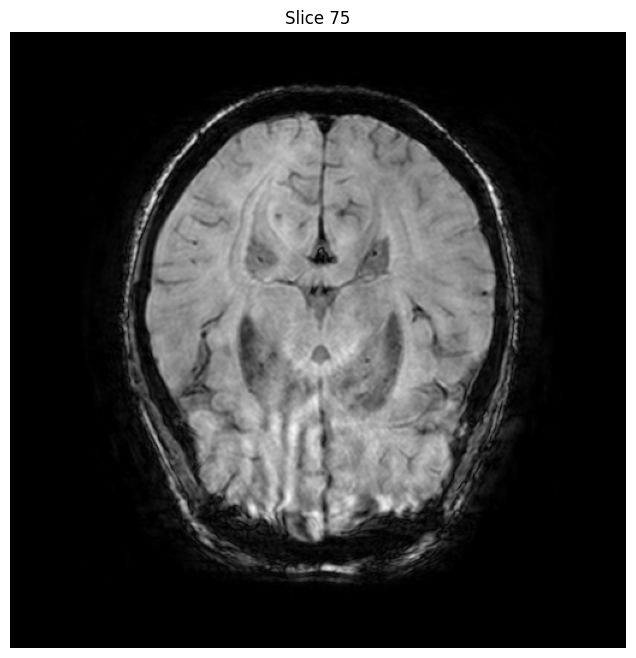

Procesando: Dou2016_005_0000.nii.gz + Dou2016_005.nii.gz
Forma de la imagen: (512, 512, 150)


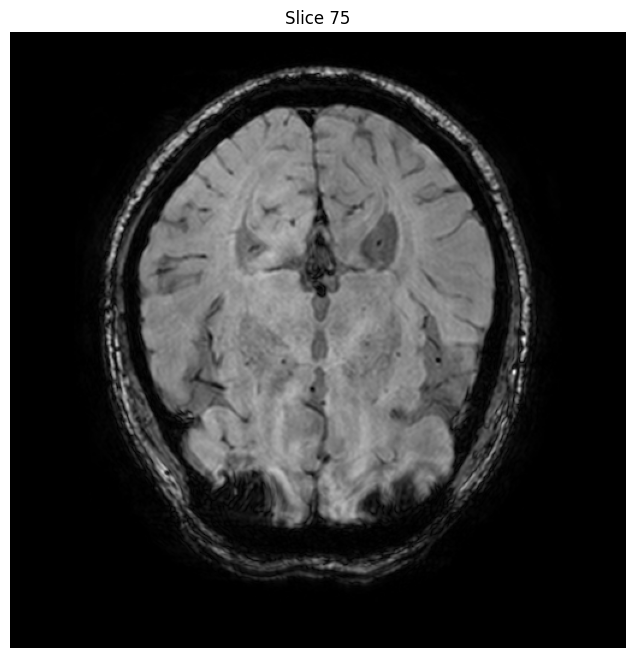

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Rutas
# -----------------------------
NNUNET_DIR = "/media/guest/PORT-DISK/Practicas/MicroBleeds/nnUNet_raw_data_dou/Dataset002_Dou2016"
IMAGES_DIR = os.path.join(NNUNET_DIR, "imagesTr")
LABELS_DIR = os.path.join(NNUNET_DIR, "labelsTr")

# -----------------------------
# Funciones
# -----------------------------
def load_nifti(path):
    """Carga un archivo NIfTI (.nii.gz) y devuelve array y affine."""
    nii = nib.load(path)
    return nii.get_fdata(), nii.affine

def plot_image_with_mask(img, mask, slice_idx=None, alpha=0.5):
    """Visualiza un slice de la imagen con la máscara superpuesta."""
    if slice_idx is None:
        slice_idx = img.shape[2] // 2  # central slice
    plt.figure(figsize=(8,8))
    plt.imshow(img[:, :, slice_idx].T, cmap="gray", origin="lower")
    plt.imshow(np.ma.masked_where(mask[:, :, slice_idx]==0, mask[:, :, slice_idx]).T,
               cmap="autumn", alpha=alpha, origin="lower")
    plt.title(f"Slice {slice_idx}")
    plt.axis("off")
    plt.show()

# -----------------------------
# Listar sujetos
# -----------------------------
image_files = sorted([f for f in os.listdir(IMAGES_DIR) if f.endswith("_0000.nii.gz")])
mask_files  = sorted([f for f in os.listdir(LABELS_DIR) if f.endswith(".nii.gz")])

print("Archivos de imagen encontrados:", image_files)
print("Archivos de máscara encontrados:", mask_files)

# -----------------------------
# Visualizar primeros 5 casos
# -----------------------------
for i, (img_f, mask_f) in enumerate(zip(image_files, mask_files)):
    if i >= 5:
        break

    img_path = os.path.join(IMAGES_DIR, img_f)
    mask_path = os.path.join(LABELS_DIR, mask_f)

    img, _ = load_nifti(img_path)
    mask, _ = load_nifti(mask_path)

    print(f"Procesando: {img_f} + {mask_f}")
    print(f"Forma de la imagen: {img.shape}")

    # Visualizar slice central
    slice_idx = img.shape[2] // 2
    plot_image_with_mask(img, mask, slice_idx=slice_idx)
